In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()   

print('')
print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)

4431872/4422102 [==============================] - 0s 0us/step

x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


In [ ]:
# x_train, x_test 값 범위를 0 ~ 1 사이로 정규화

x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
model = Sequential()      # model 생성

model.add(Flatten(input_shape=(28, 28, 1)))  

model.add(Dense(100, activation='relu'))     

model.add(Dense(10, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(learning_rate=0.1), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduceLR = ReduceLROnPlateau(monitor='val_loss', # val_loss 기준으로 callback 호출
                             factor=0.5,         # callback 호출시 학습률을 1/2로 줄임
                             patience=5,         # epoch 5 동안 개선되지 않으면 callback 호출
                             verbose=1)          # 로그 출력



hist = model.fit(x_train, t_train, 
                 epochs=50, validation_split=0.2,
                 callbacks=[reduceLR])

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5597 - accuracy: 0.7993 - val_loss: 0.4235 - val_accuracy: 0.8485
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4135 - accuracy: 0.8509 - val_loss: 0.3955 - val_accuracy: 0.8575
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3754 - accuracy: 0.8619 - val_loss: 0.3712 - val_accuracy: 0.8647
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3492 - accuracy: 0.8732 - val_loss: 0.3820 - val_accuracy: 0.8576
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3327 - accuracy: 0.8772 - val_loss: 0.3447 - val_accuracy: 0.8749
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3162 - accuracy: 0.8839 - val_loss: 0.3564 - val_accuracy: 0.8725
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3045 - accuracy: 0.8865 - val_loss: 0.3319 - val_accuracy:

In [ ]:
# test data 이용하여 정확도 검증

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3450 - accuracy: 0.8897


[0.3450421988964081, 0.8896999955177307]

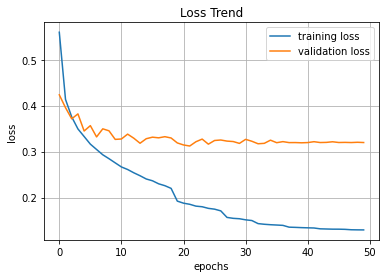

In [ ]:
# 손실함수 그래프
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

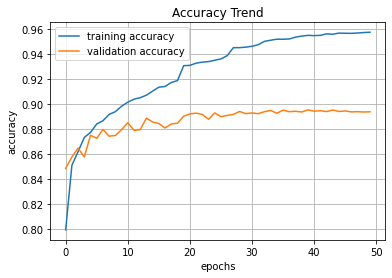

In [ ]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

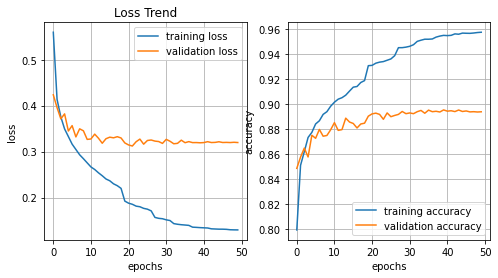

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title('Loss Trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')


plt.subplot(1, 2, 2)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()